# Pip Install Keras-Tuner (if necessary)

In [2]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 25.7 MB/s 


# Import Required Packages

In [1]:
from data_creation import DataSelection
from prediction_LSTM import SolarLSTM
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Base Model with All Parameters

In [ ]:
with open("/content/all_data.pkl", "rb") as file:
    data = pickle.load(file)

DataSelection(data, 2014, "./", 38)
# DataSelection(data, 2015, "./")

Num GB used in data array: 0.0
Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.00268399715423584
Num GB used in data array: 0.00268399715423584
Num GB used in data array: 0.006217360496520996
Num GB used in data array: 0.006217360496520996
Num GB used in data array: 0.011721253395080566
Num GB used in data array: 0.011721253395080566
Num GB used in data array: 0.013895630836486816
Num GB used in data array: 0.013895630836486816
Num GB used in data array: 0.015526413917541504
Num GB used in data array: 0.015526413917541504
Num GB used in data array: 0.015526413917541504
Num GB used in data array: 0.016783475875854492
Num GB used in data array: 0.016783475875854492
Num GB used in data array: 0.02300083637237549
Num GB used in data array: 0.02300083637237549
Num GB used in data array: 0.023374557495117188
Num GB used in data array: 0.023374557495117188
Num GB used in data array: 0.026805996894836426
Num GB used

In [ ]:
with open("norm_scaler.pkl", "rb") as norm_file:
    normalization = pickle.load(norm_file)

with open("stand_scaler.pkl", "rb") as stand_file:
    standard = pickle.load(stand_file)

DataSelection(data, 2015,"./", 38, norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0
Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.0019025802612304688
Num GB used in data array: 0.0031256675720214844
Num GB used in data array: 0.0031256675720214844
Num GB used in data array: 0.010973811149597168
Num GB used in data array: 0.010973811149597168
Num GB used in data array: 0.017496943473815918
Num GB used in data array: 0.017496943473815918
Num GB used in data array: 0.02415597438812256
Num GB used in data array: 0.02415597438812256
Num GB used in data array: 0.03142654895782471
Num GB used in data array: 0.03142654895782471
Num GB used in data array: 0.033329129219055176
Num GB used in data array: 0.033329129219055176
Num GB used in data array: 0.035231709480285645
Num GB used in data array: 0.035231709480285645
Num GB used in data array: 0.04630744457244873
Num GB used in data array: 0.04630744457244873
Num GB used in data array: 0.04668116569519043
Num GB used in data array: 0.04668116569519043
Num GB used i

In [ ]:
data2014 = np.load("data_2014.npy")
labels2014 = np.load("labels_2014.npy")

In [ ]:
data2014.shape

(25649, 120, 38)

In [ ]:
# # Need to adjust data size to ensure that each batch is of size 64
# adjusted_data = data2014[:data2014.shape[0]-18, :, :]
# adjusted_labels = labels2014[:labels2014.shape[0]-18, :, :]

In [ ]:
base_model = SolarLSTM(data2014, labels2014, save_path="./")

In [ ]:
base_model.build_model()

In [ ]:
base_model.model

In [ ]:
history=base_model.fit()

In [ ]:
data2015 = np.load("data_2015.npy")
labels2015 = np.load("labels_2015.npy")

In [ ]:
data2015.shape

(28486, 120, 38)

In [ ]:
data_new = base_model.batch_prefetch_data(data2015,labels2015,split_data=False)
base_model.evaluate(data_new)
#base_model.evaluate(data_new,labels_new)

NameError: ignored

In [ ]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015 = base_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
true_labels = labels2015[:-(labels2015.shape[0]%base_model.batch_size)]

In [ ]:
#Do predictions and get confusion matrix
conf_matrix = base_model.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

In [ ]:
#If you want to customize the confusion matrix plot, can uncomment below and use the plot handle below
#conf_plt_handle=base_model.plot_confusion_matrix(conf_matrix)

In [ ]:
conf_matrix

array([[  90185,  473455],
       [ 204978, 2648982]])

In [ ]:
#Example of using the __call__ dunder method to pass data
call_preds=base_model(batched_2015)

In [ ]:
import pandas as pd

def calculate_statistics(conf_matrix):
  tp = conf_matrix[1][1]
  fp = conf_matrix[1][0]
  tn = conf_matrix[0][0]
  fn = conf_matrix[0][1]

  # Precision - TP/(TP+FP)
  precision = tp / np.sum([tp, fp])

  # Recall - TP/(TP+FN)
  recall = tp / np.sum([tp, fn])

  # False Alarm Rate/Probability of False Alarm - FP/(FP+TN)
  far = fp / np.sum([fp, tn])

  # Heidke Skill Score (HSS) - 2*(TP * TN - FP * FN) / (TP+FN)*(FN+TN)+(TP+FP)*(FP+TN)
  hss = (2 * ((tp*tn) - (fp*fn))) / (((tp+fn)*(fn+tn)) + ((tp+tn)*(fp+tn)))

  return pd.DataFrame({"precision": precision, "recall": recall, "far": far, "hss": hss}, index=[0])

In [ ]:
calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.928178,0.84837,0.694457,0.110457


In [ ]:
keras.backend.clear_session()

In [ ]:
tuned_model = SolarLSTM(data2014, labels2014, "./", tune=True)

Trial 10 Complete [00h 06m 59s]
val_accuracy: 0.8156917095184326

Best val_accuracy So Far: 0.8275374174118042
Total elapsed time: 01h 50m 10s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3907 - accuracy: 0.8826 - mse: 0.1095 - mae: 0.2211

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 34s 95ms/step - loss: 0.3907 - accuracy: 0.8826 - mse: 0.1095 - mae: 0.2211 - val_loss: 0.5295 - val_accuracy: 0.8094 - val_mse: 0.1634 - val_mae: 0.2496
Epoch 2/50
320/320 [==============================] - 22s 69ms/step - loss: 0.3341 - accuracy: 0.8996 - mse: 0.0922 - mae: 0.1833 - val_loss: 0.5519 - val_accuracy: 0.8094 - val_mse: 0.1668 - val_mae: 0.2391
Epoch 3/50
320/320 [==============================] - 22s 68ms/step - loss: 0.3180 - accuracy: 0.8996 - mse: 0.0886 - mae: 0.1743 - val_loss: 0.5776 - val_accuracy: 0.8094 - val_mse: 0.1699 - val_mae: 0.2281
Epoch 4/50
320/320 [==============================] - 21s 67ms/step - loss: 0.3006 - accuracy: 0.8938 - mse: 0.0831 - mae: 0.1658 - val_loss: 0.5367 - val_accuracy: 0.8094 - val_mse: 0.1589 - val_mae: 0.2173
Epoch 5/50
320/320 [==============================] - 21s 67ms/step - loss: 0.2843 - accuracy: 0.8936 - mse: 0.0789 - mae: 0.1564 - val_loss: 0.6038 - val_accuracy: 0.8158 - val_m

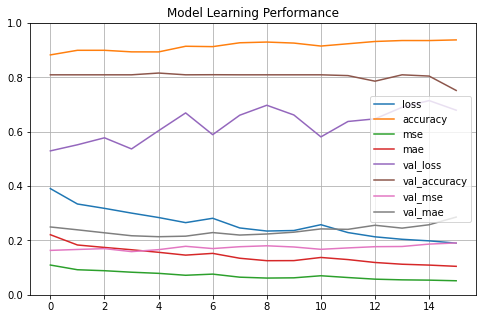

In [ ]:
tuned_model.fit()

In [ ]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015 = tuned_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
true_labels = labels2015[:-(labels2015.shape[0]%tuned_model.batch_size)]

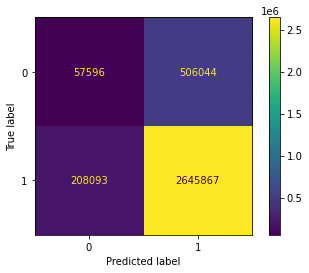

In [ ]:
conf_matrix = tuned_model.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

In [ ]:
calculate_statistics(conf_matrix)

,precision,recall,far,hss
0,0.927086,0.839449,0.78322,0.037748


In [ ]:
tuned_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (64, 120, 16)             3520      
                                                                 
 lstm_3 (LSTM)               (64, 120, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (64, 120, 16)             0         
                                                                 
 dense_1 (Dense)             (64, 120, 1)              17        
                                                                 
Total params: 5,649
Trainable params: 5,649
Non-trainable params: 0
_________________________________________________________________


# Models for ONLY Magnetic Field Parameters

In DataSelection() set the following arguments:

* use_all=False
* select_columns=[magnetic field parameters]

In [ ]:
mf_parameters = ["TOTUSJH", "TOTBSQ", "TOTPOT", "TOTUSJZ", "ABSNJZH", "SAVNCPP",
                 "USFLUX", "TOTFZ", "MEANPOT", "EPSZ", "MEANSHR", "SHRGT45", 
                 "MEANGAM", "MEANGBT", "MEANGBZ", "MEANGBH", "MEANJZH", "TOTFY",
                 "MEANJZD", "MEANALP", "TOTFX", "EPSY", "EPSX", "R_VALUE"]

## Creating Data

In [ ]:
with open("/content/all_data.pkl", "rb") as file:
    data = pickle.load(file)

DataSelection(data, 2014, "./", 24, use_all=False, select_columns=mf_parameters)

Num GB used in data array: 0.0
Num GB used in data array: 0.001201629638671875
Num GB used in data array: 0.001201629638671875
Num GB used in data array: 0.0016951560974121094
Num GB used in data array: 0.0016951560974121094
Num GB used in data array: 0.003926753997802734
Num GB used in data array: 0.003926753997802734
Num GB used in data array: 0.007402896881103516
Num GB used in data array: 0.007402896881103516
Num GB used in data array: 0.008776187896728516
Num GB used in data array: 0.008776187896728516
Num GB used in data array: 0.009806156158447266
Num GB used in data array: 0.009806156158447266
Num GB used in data array: 0.009806156158447266
Num GB used in data array: 0.010600090026855469
Num GB used in data array: 0.010600090026855469
Num GB used in data array: 0.014526844024658203
Num GB used in data array: 0.014526844024658203
Num GB used in data array: 0.01476287841796875
Num GB used in data array: 0.01476287841796875
Num GB used in data array: 0.016930103302001953
Num GB us

In [ ]:
with open("norm_scaler.pkl", "rb") as norm_file:
    normalization = pickle.load(norm_file)

with open("stand_scaler.pkl", "rb") as stand_file:
    standard = pickle.load(stand_file)

DataSelection(data, 2015,"./", 24, use_all=False, select_columns=mf_parameters,
              norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0
Num GB used in data array: 0.001201629638671875
Num GB used in data array: 0.001201629638671875
Num GB used in data array: 0.0019741058349609375
Num GB used in data array: 0.0019741058349609375
Num GB used in data array: 0.006930828094482422
Num GB used in data array: 0.006930828094482422
Num GB used in data array: 0.011050701141357422
Num GB used in data array: 0.011050701141357422
Num GB used in data array: 0.015256404876708984
Num GB used in data array: 0.015256404876708984
Num GB used in data array: 0.019848346710205078
Num GB used in data array: 0.019848346710205078
Num GB used in data array: 0.021049976348876953
Num GB used in data array: 0.021049976348876953
Num GB used in data array: 0.022251605987548828
Num GB used in data array: 0.022251605987548828
Num GB used in data array: 0.029246807098388672
Num GB used in data array: 0.029246807098388672
Num GB used in data array: 0.02948284149169922
Num GB used in data array: 0.02948284149169922
Num GB us

## Load Data and Run Models

In [ ]:
data2014_mf = np.load("data_2014.npy")
labels2014_mf = np.load("labels_2014.npy")

In [ ]:
mf_model = SolarLSTM(data2014_mf, labels2014_mf, "./", 24)

In [ ]:
mf_model.build_model()

In [ ]:
mf_model.model

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3993 - accuracy: 0.8578 - mse: 0.1182 - mae: 0.2402

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 30s 83ms/step - loss: 0.3993 - accuracy: 0.8578 - mse: 0.1182 - mae: 0.2402 - val_loss: 0.5826 - val_accuracy: 0.8094 - val_mse: 0.1701 - val_mae: 0.2405
Epoch 2/50
320/320 [==============================] - 17s 54ms/step - loss: 0.3142 - accuracy: 0.8994 - mse: 0.0883 - mae: 0.1725 - val_loss: 0.6397 - val_accuracy: 0.8094 - val_mse: 0.1765 - val_mae: 0.2323
Epoch 3/50
319/320 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.8803 - mse: 0.0877 - mae: 0.1718

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 25s 77ms/step - loss: 0.3111 - accuracy: 0.8807 - mse: 0.0874 - mae: 0.1714 - val_loss: 0.5797 - val_accuracy: 0.8094 - val_mse: 0.1696 - val_mae: 0.2501
Epoch 4/50
320/320 [==============================] - 18s 55ms/step - loss: 0.2931 - accuracy: 0.8973 - mse: 0.0822 - mae: 0.1668 - val_loss: 0.6261 - val_accuracy: 0.8094 - val_mse: 0.1757 - val_mae: 0.2573
Epoch 5/50
320/320 [==============================] - 18s 55ms/step - loss: 0.2734 - accuracy: 0.8978 - mse: 0.0765 - mae: 0.1538 - val_loss: 0.6836 - val_accuracy: 0.8094 - val_mse: 0.1791 - val_mae: 0.2203
Epoch 6/50
320/320 [==============================] - 17s 54ms/step - loss: 0.2711 - accuracy: 0.9018 - mse: 0.0761 - mae: 0.1518 - val_loss: 0.6502 - val_accuracy: 0.8093 - val_mse: 0.1786 - val_mae: 0.2733
Epoch 7/50
320/320 [==============================] - 17s 54ms/step - loss: 0.2490 - accuracy: 0.9051 - mse: 0.0703 - mae: 0.1418 - val_loss: 0.7692 - val_accuracy: 0.8093 - val_m

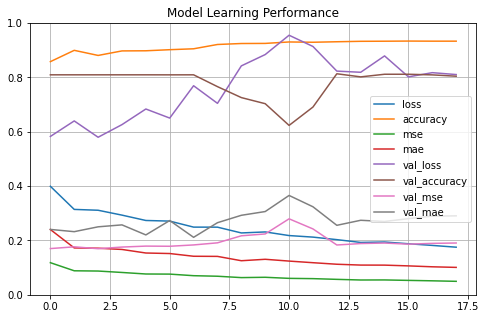

In [ ]:
history=mf_model.fit()

In [ ]:
data2015_mf = np.load("data_2015.npy")
labels2015_mf = np.load("labels_2015.npy")

In [ ]:
data2015_mf.shape

(28486, 120, 24)

In [ ]:
mf_new = mf_model.batch_prefetch_data(data2015_mf,labels2015_mf,split_data=False)
mf_model.evaluate(mf_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 8s 17ms/step - loss: 0.6813 - accuracy: 0.8208 - mse: 0.1606 - mae: 0.2046


[0.6813469529151917,
 0.8208236694335938,
 0.16059425473213196,
 0.20464786887168884]

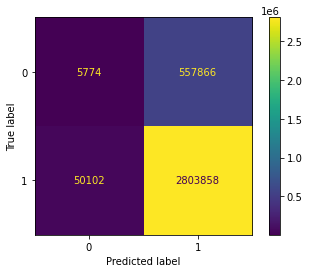

In [ ]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_mf = mf_model.batch_prefetch_data(data2015_mf,split_data=False)
#Cutoff matching remainder from labels
true_labels_mf = labels2015_mf[:-(labels2015_mf.shape[0] % mf_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_mf = mf_model.predict_conf_matrix(batched_2015_mf,true_labels_mf,make_plots=True)

In [ ]:
conf_matrix_mf

array([[   5774,  557866],
       [  50102, 2803858]])

In [ ]:
mf_model.calculate_statistics(conf_matrix_mf)

,precision,recall,far,hss
0,0.982445,0.834054,0.896664,-0.011464


In [ ]:
keras.backend.clear_session()

In [ ]:
tuned_model_mf = SolarLSTM(data2014_mf, labels2014_mf, "./", 24, tune=True)

In [ ]:
tuned_model_mf.fit()

Trial 1 Complete [00h 24m 41s]
val_accuracy: 0.8131054639816284

Best val_accuracy So Far: 0.8131054639816284
Total elapsed time: 00h 24m 41s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
96                |80                |units

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3789 - accuracy: 0.8859 - mse: 0.1061 - mae: 0.2029

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 65s 196ms/step - loss: 0.3789 - accuracy: 0.8859 - mse: 0.1061 - mae: 0.2029 - val_loss: 0.6714 - val_accuracy: 0.8094 - val_mse: 0.1787 - val_mae: 0.2124
Epoch 2/50
320/320 [==============================] - ETA: 0s - loss: 0.3519 - accuracy: 0.8996 - mse: 0.0967 - mae: 0.1887

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 62s 195ms/step - loss: 0.3519 - accuracy: 0.8996 - mse: 0.0967 - mae: 0.1887 - val_loss: 0.5413 - val_accuracy: 0.8094 - val_mse: 0.1653 - val_mae: 0.2447
Epoch 3/50
320/320 [==============================] - 56s 176ms/step - loss: 0.3002 - accuracy: 0.8964 - mse: 0.0858 - mae: 0.1587 - val_loss: 0.9811 - val_accuracy: 0.8094 - val_mse: 0.1882 - val_mae: 0.1956
Epoch 4/50
320/320 [==============================] - 56s 176ms/step - loss: 0.3691 - accuracy: 0.8996 - mse: 0.0992 - mae: 0.1852 - val_loss: 0.5535 - val_accuracy: 0.8094 - val_mse: 0.1672 - val_mae: 0.2383
Epoch 5/50
320/320 [==============================] - 56s 174ms/step - loss: 0.3049 - accuracy: 0.8981 - mse: 0.0882 - mae: 0.1561 - val_loss: 0.8987 - val_accuracy: 0.8094 - val_mse: 0.1871 - val_mae: 0.1965


In [ ]:
#Form batches (does not shuffle, cuts off remainder)
# batched_2015 = tuned_model.batch_prefetch_data(data2015,split_data=False)
#Cutoff matching remainder from labels
# true_labels = labels2015[:-(labels2015.shape[0]%tuned_model.batch_size)]

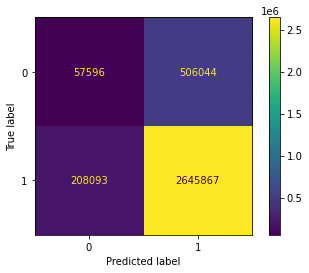

In [ ]:
conf_matrix = tuned_model_mf.predict_conf_matrix(batched_2015,true_labels,make_plots=True)

# Feature Selection Model

In [4]:
with open("/content/all_data.pkl", "rb") as file:
    data = pickle.load(file)

In [5]:
DataSelection(data, 2014, "./", feature_selection=True, use_all=False)
# DataSelection(data, 2015, "./")

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0008475780487060547
Num GB used in data array: 0.001963376998901367
Num GB used in data array: 0.003701448440551758
Num GB used in data array: 0.004388093948364258
Num GB used in data array: 0.004903078079223633
Num GB used in data array: 0.005300045013427734
Num GB used in data array: 0.0072634220123291016
Num GB used in data array: 0.007381439208984375
Num GB used in data array: 0.008465051651000977
Num GB used in data array: 0.009065866470336914
Num GB used in data array: 0.012778043746948242
Num GB used in data array: 0.01337885856628418
Num GB used in data array: 0.015106201171875
Num GB used in data array: 0.017713308334350586
Num GB used in data array: 0.018045902252197266
Num GB used in data array: 0.03292679786682129
Num GB used in data array: 0.034461021423339844
Num GB used in data array: 0.03457903861999512
Num GB used in data array: 0.03464341163635254
Num GB used in data array: 0.035083293914794

In [6]:
with open("norm_scaler.pkl", "rb") as norm_file:
    normalization = pickle.load(norm_file)

with open("stand_scaler.pkl", "rb") as stand_file:
    standard = pickle.load(stand_file)

DataSelection(data, 2015,"./", feature_selection=True, use_all=False, norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0009870529174804688
Num GB used in data array: 0.003465414047241211
Num GB used in data array: 0.005525350570678711
Num GB used in data array: 0.007628202438354492
Num GB used in data array: 0.009924173355102539
Num GB used in data array: 0.010524988174438477
Num GB used in data array: 0.011125802993774414
Num GB used in data array: 0.014623403549194336
Num GB used in data array: 0.01474142074584961
Num GB used in data array: 0.015031099319458008
Num GB used in data array: 0.01855015754699707
Num GB used in data array: 0.019150972366333008
Num GB used in data array: 0.019429922103881836
Num GB used in data array: 0.02233743667602539
Num GB used in data array: 0.02267003059387207
Num GB used in data array: 0.03632783889770508
Num GB used in data array: 0.03875255584716797
Num GB used in data array: 0.03983616828918457
Num GB used in data array: 0.03990054130554199
Num GB used in data array: 0.04019021987915039

In [7]:
data2014_sf = np.load("data_2014.npy")
labels2014_sf = np.load("labels_2014.npy")

In [8]:
data2014_sf.shape

(25649, 120, 12)

In [9]:
fs_model = SolarLSTM(data2014_sf, labels2014_sf, "./")

In [10]:
fs_model.build_model()

In [11]:
fs_model.model

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3544 - accuracy: 0.8877 - mse: 0.1049 - mae: 0.2200

INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 31s 88ms/step - loss: 0.3544 - accuracy: 0.8877 - mse: 0.1049 - mae: 0.2200 - val_loss: 0.5660 - val_accuracy: 0.8094 - val_mse: 0.1606 - val_mae: 0.2337
Epoch 2/50
320/320 [==============================] - 19s 60ms/step - loss: 0.2803 - accuracy: 0.8978 - mse: 0.0790 - mae: 0.1526 - val_loss: 0.6811 - val_accuracy: 0.8094 - val_mse: 0.1760 - val_mae: 0.2076
Epoch 3/50
320/320 [==============================] - 19s 60ms/step - loss: 0.2627 - accuracy: 0.9042 - mse: 0.0718 - mae: 0.1410 - val_loss: 0.6165 - val_accuracy: 0.8110 - val_mse: 0.1643 - val_mae: 0.2110
Epoch 4/50
320/320 [==============================] - 19s 59ms/step - loss: 0.2630 - accuracy: 0.9109 - mse: 0.0722 - mae: 0.1419 - val_loss: 0.6632 - val_accuracy: 0.7712 - val_mse: 0.1833 - val_mae: 0.2392
Epoch 5/50
320/320 [==============================] - 19s 60ms/step - loss: 0.2474 - accuracy: 0.9170 - mse: 0.0678 - mae: 0.1348 - val_loss: 0.6381 - val_accuracy: 0.8096 - val_m

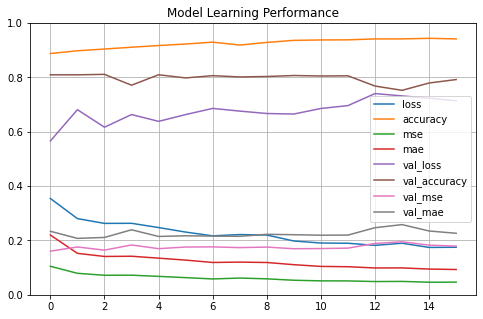

In [12]:
history=fs_model.fit()

In [13]:
data2015_sf = np.load("data_2015.npy")
labels2015_sf = np.load("labels_2015.npy")

In [14]:
data2015_sf.shape

(28486, 120, 12)

In [15]:
fs_new = fs_model.batch_prefetch_data(data2015_sf,labels2015_sf,split_data=False)
fs_model.evaluate(fs_new)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 8s 18ms/step - loss: 0.6731 - accuracy: 0.7699 - mse: 0.1864 - mae: 0.2391


[0.6731253862380981,
 0.7698897123336792,
 0.1863974779844284,
 0.23908112943172455]

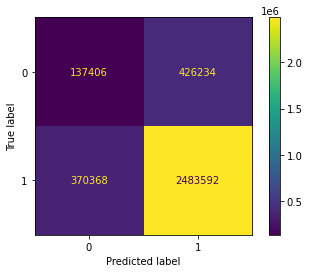

In [16]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_sf = fs_model.batch_prefetch_data(data2015_sf,split_data=False)
#Cutoff matching remainder from labels
true_labels_sf = labels2015_sf[:-(labels2015_sf.shape[0] % fs_model.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_sf = fs_model.predict_conf_matrix(batched_2015_sf,true_labels_sf,make_plots=True)

In [17]:
conf_matrix_sf

array([[ 137406,  426234],
       [ 370368, 2483592]])

In [18]:
fs_model.calculate_statistics(conf_matrix_sf)

,precision,recall,far,hss
0,0.870227,0.853519,0.729395,0.123459


# Model with Recurrent Dropout and Lower Units Tuning

* Using feature selection
* Tuning with units from 10 to 16 with step size 1
* Removed the Dropout layer and instead used the recurrent_dropout = .2 in the keras.layers.LSTM function call

In [ ]:
with open("/content/all_data.pkl", "rb") as file:
    data = pickle.load(file)

In [ ]:
DataSelection(data, 2014, "./", feature_selection=True, use_all=False)
# DataSelection(data, 2015, "./")

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0008475780487060547
Num GB used in data array: 0.001963376998901367
Num GB used in data array: 0.003701448440551758
Num GB used in data array: 0.004388093948364258
Num GB used in data array: 0.004903078079223633
Num GB used in data array: 0.005300045013427734
Num GB used in data array: 0.0072634220123291016
Num GB used in data array: 0.007381439208984375
Num GB used in data array: 0.008465051651000977
Num GB used in data array: 0.009065866470336914
Num GB used in data array: 0.012778043746948242
Num GB used in data array: 0.01337885856628418
Num GB used in data array: 0.015106201171875
Num GB used in data array: 0.017713308334350586
Num GB used in data array: 0.018045902252197266
Num GB used in data array: 0.03292679786682129
Num GB used in data array: 0.034461021423339844
Num GB used in data array: 0.03457903861999512
Num GB used in data array: 0.03464341163635254
Num GB used in data array: 0.035083293914794

In [ ]:
with open("norm_scaler.pkl", "rb") as norm_file:
    normalization = pickle.load(norm_file)

with open("stand_scaler.pkl", "rb") as stand_file:
    standard = pickle.load(stand_file)

DataSelection(data, 2015,"./", feature_selection=True, use_all=False, norm_scaler=normalization, stand_scaler=standard)

Num GB used in data array: 0.0006008148193359375
Num GB used in data array: 0.0009870529174804688
Num GB used in data array: 0.003465414047241211
Num GB used in data array: 0.005525350570678711
Num GB used in data array: 0.007628202438354492
Num GB used in data array: 0.009924173355102539
Num GB used in data array: 0.010524988174438477
Num GB used in data array: 0.011125802993774414
Num GB used in data array: 0.014623403549194336
Num GB used in data array: 0.01474142074584961
Num GB used in data array: 0.015031099319458008
Num GB used in data array: 0.01855015754699707
Num GB used in data array: 0.019150972366333008
Num GB used in data array: 0.019429922103881836
Num GB used in data array: 0.02233743667602539
Num GB used in data array: 0.02267003059387207
Num GB used in data array: 0.03632783889770508
Num GB used in data array: 0.03875255584716797
Num GB used in data array: 0.03983616828918457
Num GB used in data array: 0.03990054130554199
Num GB used in data array: 0.04019021987915039

In [3]:
data2014_sf = np.load("data_2014.npy")
labels2014_sf = np.load("labels_2014.npy")

In [4]:
data2014_sf.shape

(25649, 120, 12)

In [9]:
model3 = SolarLSTM(data2014_sf, labels2014_sf, "./", tune=True,
                   units=(10, 16, 1), regularization=("early stopping"))

In [10]:
model3.build_model()

In [11]:
model3.model

Trial 10 Complete [00h 10m 22s]
val_accuracy: 0.8107714653015137

Best val_accuracy So Far: 0.8234326243400574
Total elapsed time: 01h 46m 08s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Hyper Tuning Complete
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


320/320 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.8748 - mse: 0.1108 - mae: 0.2415INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 42s 122ms/step - loss: 0.3670 - accuracy: 0.8748 - mse: 0.1108 - mae: 0.2415 - val_loss: 0.6097 - val_accuracy: 0.7730 - val_mse: 0.1791 - val_mae: 0.2626
Epoch 2/50
320/320 [==============================] - ETA: 0s - loss: 0.2665 - accuracy: 0.9151 - mse: 0.0729 - mae: 0.1464INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 39s 123ms/step - loss: 0.2665 - accuracy: 0.9151 - mse: 0.0729 - mae: 0.1464 - val_loss: 0.6022 - val_accuracy: 0.7784 - val_mse: 0.1739 - val_mae: 0.2499
Epoch 3/50
320/320 [==============================] - 32s 100ms/step - loss: 0.2606 - accuracy: 0.9103 - mse: 0.0719 - mae: 0.1425 - val_loss: 0.6618 - val_accuracy: 0.7271 - val_mse: 0.1944 - val_mae: 0.2767
Epoch 4/50
320/320 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.9094 - mse: 0.0713 - mae: 0.1428INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


320/320 [==============================] - 38s 119ms/step - loss: 0.2572 - accuracy: 0.9094 - mse: 0.0713 - mae: 0.1428 - val_loss: 0.5946 - val_accuracy: 0.7873 - val_mse: 0.1675 - val_mae: 0.2334
Epoch 5/50
320/320 [==============================] - 32s 100ms/step - loss: 0.2394 - accuracy: 0.9249 - mse: 0.0649 - mae: 0.1310 - val_loss: 0.6305 - val_accuracy: 0.7758 - val_mse: 0.1752 - val_mae: 0.2348
Epoch 6/50
320/320 [==============================] - 32s 101ms/step - loss: 0.2322 - accuracy: 0.9255 - mse: 0.0633 - mae: 0.1265 - val_loss: 0.6533 - val_accuracy: 0.7732 - val_mse: 0.1797 - val_mae: 0.2367
Epoch 7/50
320/320 [==============================] - 32s 99ms/step - loss: 0.2261 - accuracy: 0.9280 - mse: 0.0615 - mae: 0.1253 - val_loss: 0.6459 - val_accuracy: 0.8078 - val_mse: 0.1702 - val_mae: 0.2256
Epoch 8/50
320/320 [==============================] - 32s 99ms/step - loss: 0.2196 - accuracy: 0.9241 - mse: 0.0611 - mae: 0.1228 - val_loss: 0.6933 - val_accuracy: 0.7763 - va

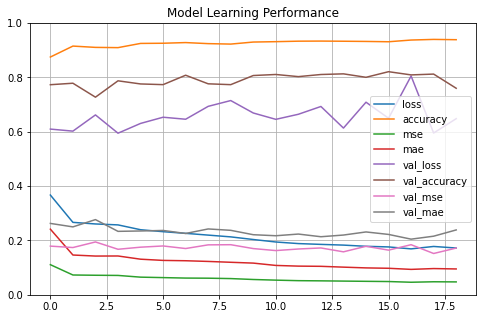

In [12]:
history=model3.fit()

In [13]:
data2015_sf = np.load("data_2015.npy")
labels2015_sf = np.load("labels_2015.npy")

In [14]:
data2015_sf.shape

(28486, 120, 12)

In [15]:
new3 = model3.batch_prefetch_data(data2015_sf,labels2015_sf,split_data=False)
model3.evaluate(new3)
#base_model.evaluate(data_new,labels_new)

445/445 [==============================] - 11s 25ms/step - loss: 0.6049 - accuracy: 0.7821 - mse: 0.1647 - mae: 0.2305


[0.6049373745918274,
 0.7820546627044678,
 0.1646636724472046,
 0.23050378262996674]

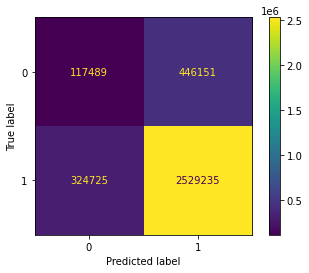

In [16]:
#Form batches (does not shuffle, cuts off remainder)
batched_2015_3 = model3.batch_prefetch_data(data2015_sf,split_data=False)
#Cutoff matching remainder from labels
true_labels_3 = labels2015_sf[:-(labels2015_sf.shape[0] % model3.batch_size)]
#Do predictions and get confusion matrix
conf_matrix_3 = model3.predict_conf_matrix(batched_2015_3,true_labels_3,make_plots=True)

In [17]:
conf_matrix_3

array([[ 117489,  446151],
       [ 324725, 2529235]])

In [18]:
model3.calculate_statistics(conf_matrix_3)

,precision,recall,far,hss
0,0.886219,0.850053,0.734316,0.106959


In [19]:
true_labels_3.shape

(28480, 120, 1)